<a href="https://colab.research.google.com/github/csanyika/Python_assignments/blob/main/Iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTION 1

In [ ]:
import pandas as pd
import numpy as np
HELPrct = pd.read_csv('https://raw.githubusercontent.com/gjm112/DSCI401/main/data/HELPrct.csv')
HELPrct.head()

,age,anysubstatus,anysub,cesd,d1,daysanysub,dayslink,drugrisk,e2b,female,...,pcs,pss_fr,racegrp,satreat,sexrisk,substance,treat,avg_drinks,max_drinks,hospitalizations
0,37,1.0,yes,49,3,177.0,225.0,0.0,NaN,0,...,58.413689,0,black,no,4,cocaine,yes,13,26,3
1,37,1.0,yes,30,22,2.0,NaN,0.0,NaN,0,...,36.036942,1,white,no,7,alcohol,yes,56,62,22
2,26,1.0,yes,39,0,3.0,365.0,20.0,NaN,0,...,74.806328,13,black,no,2,heroin,no,0,0,0
3,39,1.0,yes,15,2,189.0,343.0,0.0,1.0,1,...,61.931679,11,white,yes,4,heroin,no,5,5,2
4,32,1.0,yes,39,12,2.0,57.0,0.0,1.0,0,...,37.345585,10,black,no,6,cocaine,no,10,13,12


(a)  Use the HELPrct data from the mosaicData to calculate the mean of all numeric variables (be sure to exclude missing values).

In [ ]:
#Select columns that have numeric values.
HELPrct_sub = HELPrct.select_dtypes(include='number')
#Calculate the mean and skip NA values.
HELPrct_sub.mean(skipna=True)

age                  35.653422
anysubstatus          0.772358
cesd                 32.847682
d1                    3.059603
daysanysub           75.307377
dayslink            255.605568
drugrisk              1.887168
e2b                   2.504673
female                0.236203
i1                   17.907285
i2                   24.547461
id                  233.401766
indtot               35.728477
linkstatus            0.378190
mcs                  31.676678
pcs                  48.048542
pss_fr                6.706402
sexrisk               4.642384
avg_drinks           17.907285
max_drinks           24.547461
hospitalizations      3.059603
dtype: float64

(b) Find the mean of all the numeric variables stratified by sex and age group where age groups are defined as ranges of 10 years (i.e. 0-10, 10-20, 20-30, etc).

In [ ]:
#Define the age group ranges and titles.
age_bins = [0,10,20,30,40,50,60,70]
age_names = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70"]
#Create variable that puts each age into an age range.
HELPrct["age_group"] = pd.cut(HELPrct["age"], bins=age_bins, labels=age_names)
#Group by sex and age group and find the ave of the numeric (selected) columns.
selected = HELPrct.select_dtypes(include='number').columns
grp_HELPrct = HELPrct.groupby(["age_group","sex"])[selected].mean()
grp_HELPrct

age  anysubstatus       cesd        d1  daysanysub  \
age_group sex                                                                
0-10      female        NaN           NaN        NaN       NaN         NaN   
          male          NaN           NaN        NaN       NaN         NaN   
10-20     female        NaN           NaN        NaN       NaN         NaN   
          male    19.666667      1.000000  38.666667  1.000000   98.500000   
20-30     female  27.086957      0.769231  38.652174  2.304348   67.153846   
          male    26.711111      0.785714  32.211111  1.933333   77.928571   
30-40     female  34.982456      0.730769  36.596491  3.631579   91.769231   
          male    35.143713      0.789474  30.550898  2.568862   73.627660   
40-50     female  45.500000      0.600000  35.583333  4.333333   85.666667   
          male    44.109589      0.809524  32.465753  4.452055   69.487805   
50-60     female  56.666667      0.666667  39.333333  3.000000   77.000000   
          male    55.384615      0.750000  34.307692  6.307692   45.000000   
60-70     female        NaN           NaN        NaN       NaN         NaN   
          male          NaN           NaN        NaN       NaN         NaN   

                    dayslink  drugrisk       e2b  female         i1  ...  \
age_group sex                                                        ...   
0-10      female         NaN       NaN       NaN     NaN        NaN  ...   
          male           NaN       NaN       NaN     NaN        NaN  ...   
10-20     female         NaN       NaN       NaN     NaN        NaN  ...   
          male    264.333333  0.000000  8.000000     0.0  21.333333  ...   
20-30     female  295.700000  2.521739  2.500000     1.0   8.304348  ...   
          male    263.764706  3.022472  2.159091     0.0  12.344444  ...   
30-40     female  271.709091  1.543860  1.764706     1.0  16.877193  ...   
          male    245.289308  1.293413  2.560976     0.0  19.568862  ...   
40-50     female  244.608696  1.708333  2.166667     1.0  17.458333  ...   
          male    246.757143  2.178082  3.027778     0.0  21.890411  ...   
50-60     female  261.666667  0.000000  1.500000     1.0   8.666667  ...   
          male    262.307692  1.692308  3.125000     0.0  36.384615  ...   
60-70     female         NaN       NaN       NaN     NaN        NaN  ...   
          male           NaN       NaN       NaN     NaN        NaN  ...   

                          id     indtot  linkstatus        mcs        pcs  \
age_group sex                                                               
0-10      female         NaN        NaN         NaN        NaN        NaN   
          male           NaN        NaN         NaN        NaN        NaN   
10-20     female         NaN        NaN         NaN        NaN        NaN   
          male    186.666667  33.666667    0.333333  42.749625  49.115093   
20-30     female  183.347826  33.130435    0.250000  27.039288  47.081356   
          male    238.522222  35.966667    0.364706  31.295583  52.064558   
30-40     female  259.947368  32.982456    0.309091  28.582845  45.030443   
          male    232.634731  36.892216    0.421384  32.833477  49.043139   
40-50     female  209.708333  30.583333    0.391304  32.156743  44.055981   
          male    238.424658  37.246575    0.385714  32.349436  47.101086   
50-60     female  152.333333  29.333333    0.333333  24.527099  36.600175   
          male    225.000000  38.692308    0.384615  35.655033  37.499987   
60-70     female         NaN        NaN         NaN        NaN        NaN   
          male           NaN        NaN         NaN        NaN        NaN   

                    pss_fr   sexrisk  avg_drinks  max_drinks  hospitalizations  
age_group sex                                                                   
0-10      female       NaN       NaN         NaN         NaN               NaN  
          male         NaN       NaN         NaN         NaN               NaN  
1

(c)  Using the data set created in the previous problem, create a set of line plots with the average age of the age group on the x-axis and each of other numeric variables on the y-axis in separate plots stratified by sex.

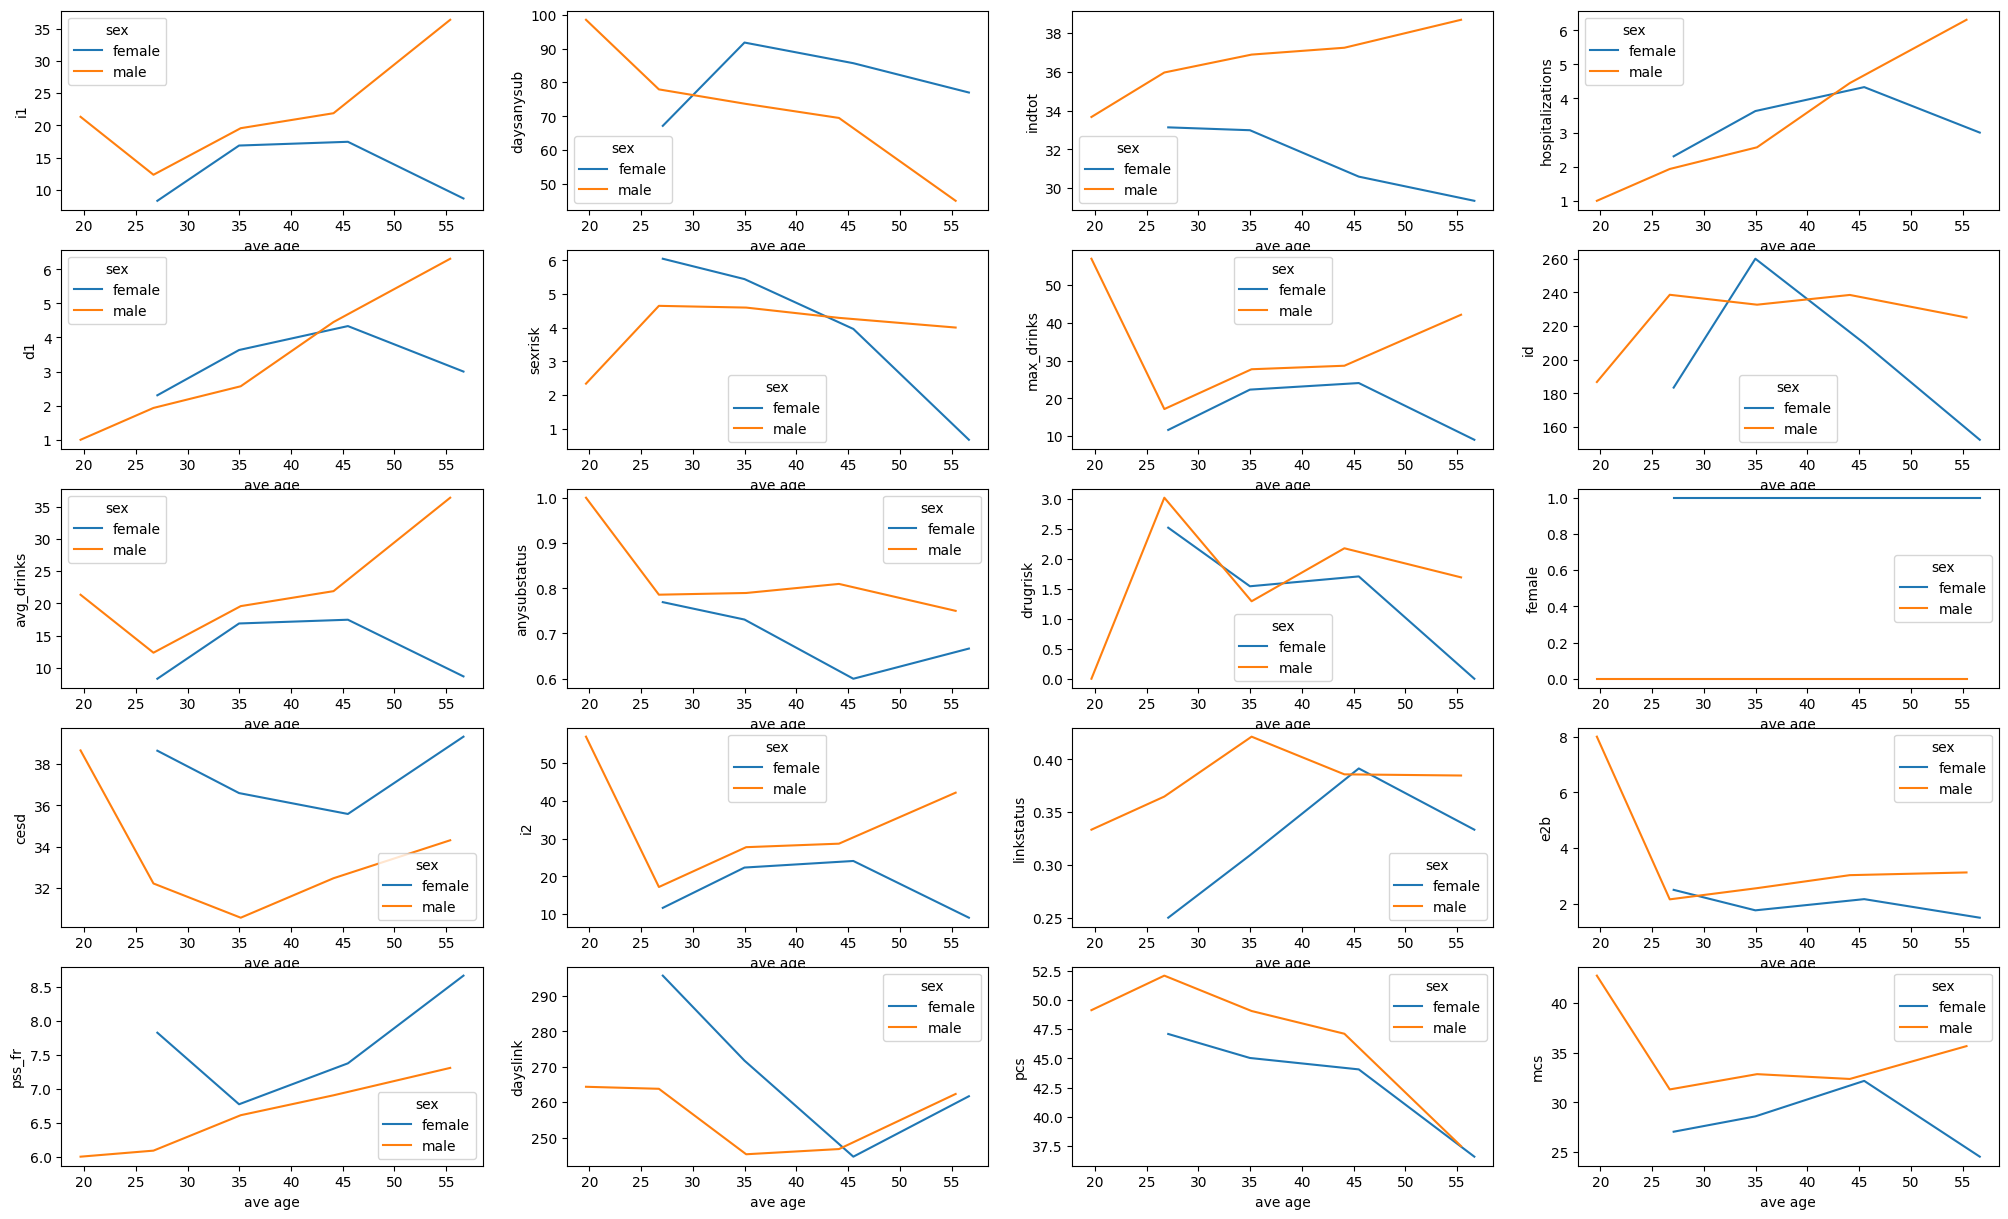

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Set the figure size
plt.figure(figsize=(25,15))

#Define the titles of the columns to use as response (y) variables
titles = grp_HELPrct.columns
to_remove = ["sex", "age_group", "age"]
titles = list(set(titles)- set(to_remove))

#Create a function that plots ave age against the response varible and puts the plots next to each other.
def ageGroup_plot(num_variable):
  plt.subplot(5,4,titles.index(num_variable) + 1)
  sns.lineplot(x="age", y=num_variable, data=grp_HELPrct, hue="sex")
  plt.xlabel('ave age')
  plt.ylabel(num_variable)

list(map(ageGroup_plot,titles))
plt.show()

QUESTION 2

The team IDs corresponding to Brooklyn baseball teams from the Teams data frame from the Lahman package are listed below. Find the number of seasons in which each of those teams played by calling a function called count seasons.

In [ ]:
Teams = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/Teams.csv")
bk_teams = ["BR1", "BR2", "BR3", "BR4", "BRO", "BRP", "BRF"]

#function selects columns with the teamID from list and counts how many times each teamID appears.
def count_seasons(code):
  selected_team = Teams[Teams.teamID.isin(bk_teams)].teamID.value_counts()
  return selected_team

count_seasons(bk_teams)

BRO    68
BR3     6
BR2     4
BRF     2
BR1     1
BR4     1
BRP     1
Name: teamID, dtype: int64